In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import string, nltk
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\SAKSHI\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [6]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\SAKSHI\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [7]:
df=pd.read_csv('fake reviews dataset.csv')

In [8]:
df.head()

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40432 entries, 0 to 40431
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   category  40432 non-null  object 
 1   rating    40432 non-null  float64
 2   label     40432 non-null  object 
 3   text_     40432 non-null  object 
dtypes: float64(1), object(3)
memory usage: 1.2+ MB


In [10]:
df.describe()

,rating
count,40432.000000
mean,4.256579
std,1.144354
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


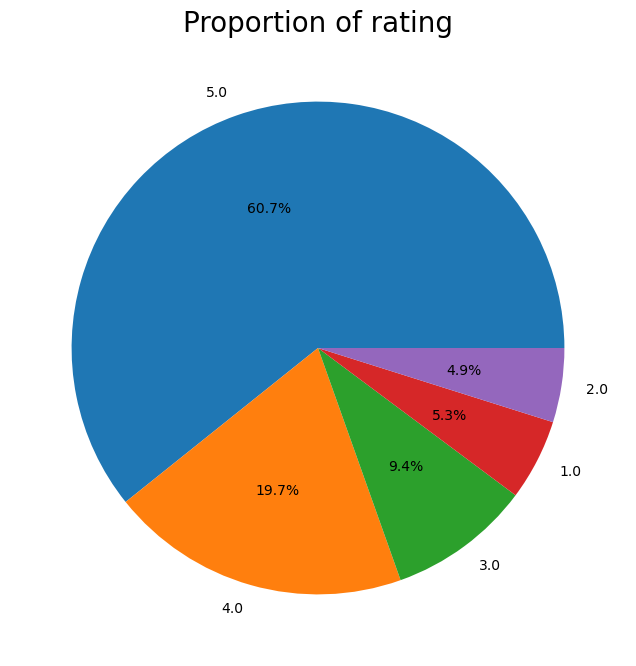

In [11]:
plt.figure(figsize=(15,8))
labels=df['rating'].value_counts().keys()
values = df['rating'].value_counts()
plt.pie(values,labels=labels,autopct='%1.1f%%')
plt.title('Proportion of rating',fontsize=20)
plt.show()

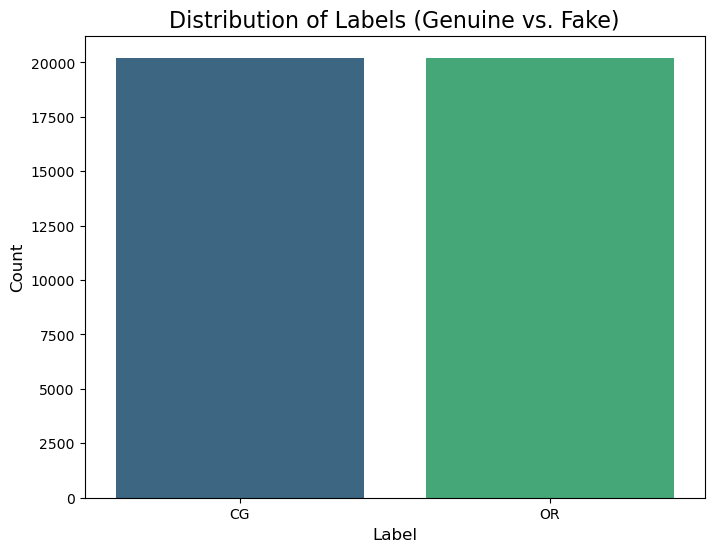

In [12]:
plt.figure(figsize=(8, 6))
label_counts = df['label'].value_counts()
sns.barplot(x=label_counts.index, y=label_counts.values, palette="viridis")
plt.title("Distribution of Labels (Genuine vs. Fake)", fontsize=16)
plt.xlabel("Label", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

In [23]:
def clean_text(text):
    #creating a list called nopunc by removing all the punctuations
    nopunc = [w for w in text if w not in string.punctuation]
    nopunc = ''.join(nopunc)
    #creating a new list by removing all the stop-words in english like the,is,in etc by converting in lower case.
    return ' '.join([word for word in nopunc.split() if word.lower() not in stopwords.words('english')])

In [24]:
df['text_'][0], clean_text(df['text_'][0])

('Love this!  Well made, sturdy, and very comfortable.  I love it!Very pretty',
 'Love Well made sturdy comfortable love itVery pretty')

In [25]:
df['text_'].head().apply(clean_text)

0    Love Well made sturdy comfortable love itVery ...
1    love great upgrade original Ive mine couple years
2              pillow saved back love look feel pillow
3          Missing information use great product price
4                 nice set Good quality set two months
Name: text_, dtype: object

In [26]:
df.shape

(40432, 4)

In [29]:
# converting the dataframe to text if in -case it contains mixed datatypes.
df['text_'] = df['text_'].astype(str)

In [32]:
# tokenize the input, removes stopwords, any numerals, or punctuations
def preprocess(text):
    return ' '.join([word for word in word_tokenize(text) if word not in stopwords.words('english') and not word.isdigit() and word not in string.punctuation])

In [37]:
df.loc[:10000, 'text_'] = df.loc[:10000, 'text_'].apply(preprocess)


In [35]:
df.loc[10000:20000, 'text_'] = df.loc[10000:20000, 'text_'].apply(preprocess)

In [36]:
df.loc[20000:30000, 'text_'] = df.loc[20000:30000, 'text_'].apply(preprocess)

In [38]:
df.loc[30000:40000, 'text_'] = df.loc[30000:40000, 'text_'].apply(preprocess)

In [39]:
df.loc[40000:40432, 'text_'] = df.loc[40000:40432, 'text_'].apply(preprocess)

In [41]:
df['text_'] = df['text_'].str.lower()

In [44]:
# reducing words to their root form by removing suffixes: (running, ran, runs = run)
stemmer = PorterStemmer()
def stem_words(text):
    return ' '.join([stemmer.stem(word) for word in text.split()])
#Each entry in df['text_'] is replaced with its stemmed version.
df['text_'] = df['text_'].apply(lambda x: stem_words(x))    

In [45]:
df['text_'].head()

0    love well made sturdi comfort i love veri pretti
1      love great upgrad origin i 've mine coupl year
2        thi pillow save back i love look feel pillow
3               miss inform use great product price i
4         veri nice set good qualiti we set two month
Name: text_, dtype: object

In [46]:
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
df["text_"] = df["text_"].apply(lambda text: lemmatize_words(text))

In [47]:
df['text_'].head()

0    love well made sturdi comfort i love veri pretti
1      love great upgrad origin i 've mine coupl year
2        thi pillow save back i love look feel pillow
3               miss inform use great product price i
4         veri nice set good qualiti we set two month
Name: text_, dtype: object

In [48]:
df.to_csv('preprocessed reviews dataset.csv')